11650854771297938629
this node has 7 children
move:(5, 8), runs:   680333, eval:-0.3434, principal:58 67 15 46 31 04 13 40 42 48 56 81 75 36 22 76 
move:(4, 8), runs:     4108, eval:-0.1916, principal:48 58 68 16 42 36 
move:(3, 8), runs:     3926, eval:-0.1844, principal:38 28 78 57 73 30 
move:(4, 6), runs:     3855, eval:-0.1813, principal:46 31 04 05 28 
move:(5, 7), runs:     3307, eval:-0.1545, principal:57 73 42 58 67 
move:(3, 6), runs:     2723, eval:-0.1138, principal:36 22 67 14 44 
move:(4, 7), runs:     1747, eval:+0.0149, principal:47 44 54 63 11 

58 67 15 46 31 04 13 40 42 48 56 81 75 36 22 76 


KeyboardInterrupt: 

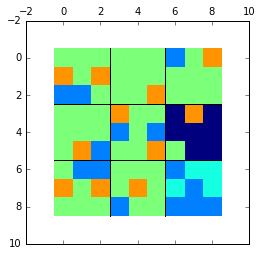

In [1]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import MC
from MC import MC_node,mc_sim
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(1,2),(0,8),(2,5),(3,3),(3,7),(5,1),(7,0),(7,4),(8,6)]:
    board[x]=1
for o in [(2,0),(2,1),(0,6),(4,3),(4,5),(6,1),(6,2),(7,7),(8,8)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(5,5),(6,6),(1,0),(5,2),(8,7),(8,3),(7,2)]:
    game.update_move(move)
log_len = len(game.log)

root = MC_node(game,1)

tact.fancy_board(game)

mc_sim(root,game,branch = 50,passes = 100000000)

nodes visited   1871
cache space     30000034
nodes stored    1023
nodes forgotten 0
current depth   0
current node    
role: max
  root: work:       425 pn0:    INF pn1:    INF dn0:      0 dn1:      0 

role: min
(6, 3): work:         1 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(7, 3): work:        41 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(7, 5): work:         6 pn0:    INF pn1:    INF dn0:      0 dn1:      0 
(8, 4): work:       376 pn0:    INF pn1:    INF dn0:      0 dn1:      0 

time 0.0207667359

(6, 3)(2, 2) p2win
(7, 3)(3, 2)
	(1, 8)(5, 7) p2win
	(2, 6)(7, 1)
		(5, 3)(8, 0)
			(6, 0)(2, 2) p2win
	(2, 7)(6, 4)
		(0, 3)(2, 2) p2win
		(1, 3)(4, 0)
			(3, 0)(2, 2) p2win
			(4, 2)(5, 7) p2win
			(5, 0)(7, 1)
				(5, 3)(8, 0)
		(1, 5)(5, 7) p2win
(7, 5)(4, 7)
	(5, 3)(8, 0)
		(6, 0)(2, 2) p2win
		(7, 1)(2, 2) p2win
(8, 4)(7, 5)
	(3, 6)(2, 2) p2win
	(3, 8)(2, 6)
		(6, 0)(2, 2) p2win
		(7, 1)(5, 3)
			(6, 0)(2, 2) p2win
			(8, 0)(6, 0)
				(0, 0)(2, 2)
				(0, 1)(1, 5)

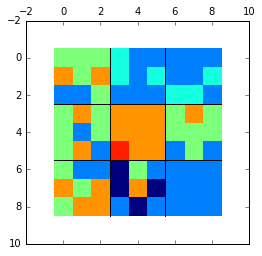

In [3]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(1,2),(0,8),(2,5),(3,3),(3,7),(5,1),(7,0),(7,4),(8,6)]:
    board[x]=1
for o in [(2,0),(2,1),(0,6),(4,3),(4,5),(6,1),(6,2),(7,7),(8,8)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(5,5),(6,6),(1,0),(5,2),(8,7),(8,3),(7,2),(5,8),(6,7),(2,3),(8,2),(7,6),(3,1),
             (0,4),(0,5),(2,8),(7,8),(5,6),(8,1),(8,5),(6,8),(1,7),(4,4),(3,5),(0,7),(1,4),
             (5,4),(6,5),(1,6),(4,1),(3,4),(2,4)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()

tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},1,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree

In [4]:
with open('jas.txt','w') as file_:
    file_.write(tree)